In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters
import time

## Load Citra BGR

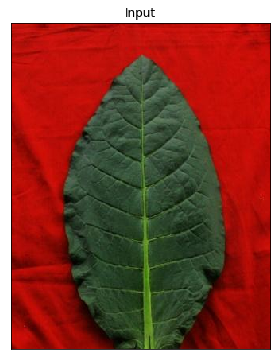

In [2]:
imgfile = 'daun_tembakau.jpg'
image = cv2.imread(imgfile)
# image
image = image[:,:,::-1]
plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(image, cmap="gray")
plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.show()

## Pemisahan Background

In [3]:
timestart = time.clock()

# Pemisahan Background
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

row, column, channel = image.shape

row, column, channel

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


(411, 327, 3)

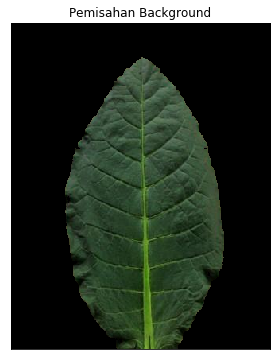

In [4]:
for i in range(row):
    for j in range(column):
        if image[i,j,0] > image[i,j,1] and image[i,j,0] > image[i,j,2]:
            image[i,j,0] = 0
            image[i,j,1] = 0
            image[i,j,2] = 0
            
split_bg = image

plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(image, cmap="gray")
plt.title('Pemisahan Background'), plt.xticks([]), plt.yticks([])
plt.show()

## Konversi Grayscale

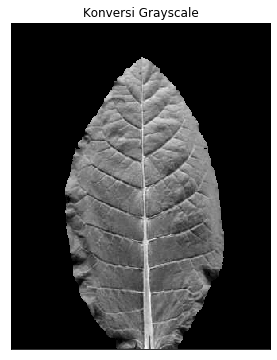

In [5]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray_img
plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(gray_img, cmap="gray")
plt.title('Konversi Grayscale'), plt.xticks([]), plt.yticks([])
plt.show()

## Gaussian Filter

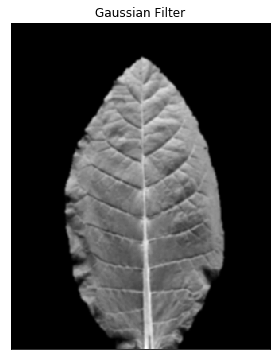

In [6]:
gauss_img0 = cv2.GaussianBlur(gray_img,(5,5),0)

plt.figure(figsize=(12,6))
plt.subplot(122),plt.imshow(gauss_img0, cmap="gray")
plt.title('Gaussian Filter'), plt.xticks([]), plt.yticks([])
plt.show()

## Deteksi Tepi Sobel

In [7]:
gauss_img = gauss_img0/256

# Deteksi Tepi Sobel
sobelx = np.array([
        [-1, 0, 1], 
        [-2, 0, 2], 
        [-1, 0, 1]], dtype = np.float)
    
sobely = np.array([
        [-1, -2, -1], 
        [0, 0, 0], 
        [1, 2, 1]], dtype = np.float)

row = gauss_img.shape[0] #row 
column = gauss_img.shape[1] #column

sobelxImage = np.zeros((row,column))
sobelyImage = np.zeros((row,column))
sobelGrad = np.zeros((row,column))

image = gauss_img

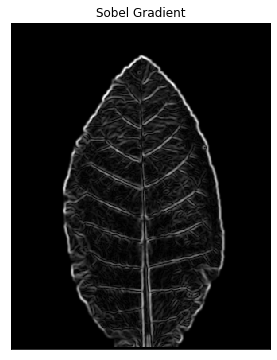

In [8]:
for i in range(1, row-1):
    for j in range(1, column-1):     
        #Calculate gx and gy using Sobel (horizontal and vertical gradients)
        gx = (sobelx[0][0] * image[i-1][j-1]) + (sobelx[0][1] * image[i-1][j]) + \
             (sobelx[0][2] * image[i-1][j+1]) + (sobelx[1][0] * image[i][j-1]) + \
             (sobelx[1][1] * image[i][j]) + (sobelx[1][2] * image[i][j+1]) + \
             (sobelx[2][0] * image[i+1][j-1]) + (sobelx[2][1] * image[i+1][j]) + \
             (sobelx[2][2] * image[i+1][j+1])

        gy = (sobely[0][0] * image[i-1][j-1]) + (sobely[0][1] * image[i-1][j]) + \
             (sobely[0][2] * image[i-1][j+1]) + (sobely[1][0] * image[i][j-1]) + \
             (sobely[1][1] * image[i][j]) + (sobely[1][2] * image[i][j+1]) + \
             (sobely[2][0] * image[i+1][j-1]) + (sobely[2][1] * image[i+1][j]) + \
             (sobely[2][2] * image[i+1][j+1])     

        sobelxImage[i-1][j-1] = gx
        sobelyImage[i-1][j-1] = gy

        #Calculate the gradient magnitude
        g = np.sqrt(gx * gx + gy * gy)
        sobelGrad[i-1][j-1] = g

# sobelGrad = np.delete(sobelGrad, np.s_[327:], 1)

plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(sobelGrad, cmap="gray")
plt.title('Sobel Gradient'), plt.xticks([]), plt.yticks([])
plt.show()

## Hysteresis Thresholding

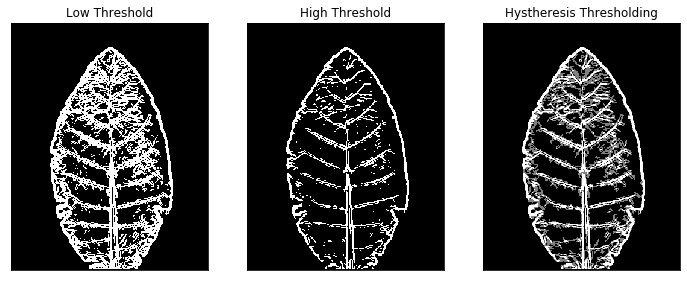

Total execution time:  3.5326569000000028


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [9]:
low = 0.1
high = 0.2

lowt = (sobelGrad > low).astype(int)
hight = (sobelGrad > high).astype(int)
hyst = filters.apply_hysteresis_threshold(sobelGrad, low, high)
hysteresis_threshold = hight + hyst

plt.figure(figsize=(12,6))
plt.subplot(131),plt.imshow(lowt, cmap="gray")
plt.title('Low Threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hight, cmap="gray")
plt.title('High Threshold'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(hysteresis_threshold, cmap="gray")
plt.title('Hystheresis Thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

timeend = time.clock() - timestart
print("Total execution time: ", timeend)

## Metode Lain

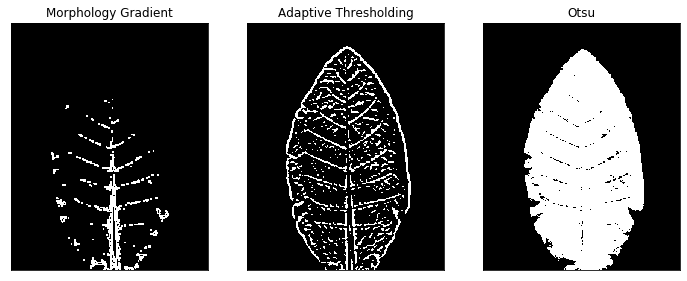

In [10]:
# ----------------morfologi gradient, adapt. threshold--------------------
hsv = cv2.cvtColor(split_bg, cv2.COLOR_BGR2HSV)
kernel = np.ones((3,3),np.uint8)

lower_red = np.array([8,180,0])
upper_red = np.array([255,255,255])

mask = cv2.inRange(hsv, lower_red, upper_red)

gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(12,6))
plt.subplot(131),plt.imshow(gradient, cmap="gray")
plt.title('Morphology Gradient'), plt.xticks([]), plt.yticks([])

adpThreshold = cv2.adaptiveThreshold(gauss_img0,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,13,4)

plt.subplot(132),plt.imshow(adpThreshold, cmap="gray")
plt.title('Adaptive Thresholding'), plt.xticks([]), plt.yticks([])

ret, thresh = cv2.threshold(gray_img, 0, 255, 
                            cv2.THRESH_BINARY +
                            cv2.THRESH_OTSU)

plt.subplot(133),plt.imshow(thresh, cmap="gray")
plt.title('Otsu'), plt.xticks([]), plt.yticks([])
plt.show()